### load data

In [3]:
from sklearn import datasets
X,y = datasets.load_breast_cancer(return_X_y=True)


In [4]:
from sklearn import datasets
d = datasets.load_breast_cancer()

### train optimized model using random search

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import loguniform, uniform

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pipeline = Pipeline([
 ('scaler', StandardScaler()),
 ('classifier', LogisticRegression(solver='saga', penalty='elasticnet'))
 ])
param_distributions = {
'classifier__C': loguniform(1e-5, 100),
'classifier__l1_ratio': uniform(0, 1),
'classifier__max_iter': np.arange(100, 1000, 100)
 }

rs = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=3, random_state=42)
rs.fit(X, y)



/Applications/anaconda3/envs/ML_Flow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/ML_Flow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/ML_Flow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/ML_Flow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/ML_Flow/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('classifier',
                                              LogisticRegression(penalty='elasticnet',
                                                                 solver='saga'))]),
                   n_iter=50,
                   param_distributions={'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17dffa080>,
                                        'classifier__l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17e086da0>,
                                        'classifier__max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   random_state=42)

### plot hyperparam C

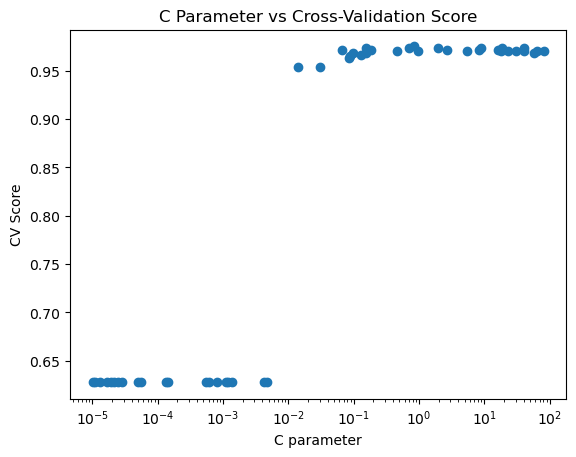

In [10]:

# Plot C parameter vs score
results = pd.DataFrame(rs.cv_results_)
plt.scatter(results['param_classifier__C'], results['mean_test_score'])
plt.xscale('log')
plt.xlabel('C parameter')
plt.ylabel('CV Score')
plt.title('C Parameter vs Cross-Validation Score')

# Log plot
plt.show()


### plot hyperparam l1

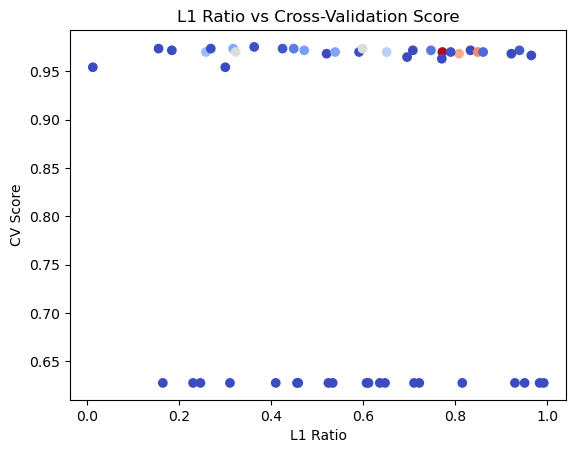

In [13]:
plt.scatter(results['param_classifier__l1_ratio'], results['mean_test_score'], c=results['param_classifier__C'],cmap='coolwarm')
plt.xlabel('L1 Ratio')
plt.ylabel('CV Score')
plt.title('L1 Ratio vs Cross-Validation Score')

# Log plot
plt.show()

In [12]:
best_params = rs.best_params_
best_score = rs.best_score_
best_estimator = rs.best_estimator_

print(best_params)
print(best_score)
print(best_estimator)

{'classifier__C': np.float64(0.8339359809165786), 'classifier__l1_ratio': np.float64(0.363629602379294), 'classifier__max_iter': np.int64(100)}
0.975392184164114
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=np.float64(0.8339359809165786),
                                    l1_ratio=np.float64(0.363629602379294),
                                    max_iter=np.int64(100),
                                    penalty='elasticnet', solver='saga'))])
